In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ML TEMPLETES\hands-on-time-series-analylsis-python-master\Data\FB.csv', parse_dates = True)

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


In [4]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [5]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [6]:
for name, column in df[['Close' ,'Open' ,'High','Low']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.338096
p-value                           0.611568
No Lags Used                      0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Open
Test Statistic                   -1.014123
p-value                           0.748078
No Lags Used                     11.000000
Number of Observations Used    1247.000000
Critical Value (1%)              -3.435605
Critical Value (5%)              -2.863861
Critical Value (10%)             -2.568005
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                   -1.255326
p-value                      

In [7]:
X = df[['Close' ]]
actualtrain, actualtest = X[0:-30], X[-30:]
exoX = df[['Open' ]]
exotrain, exotest = exoX[0:-30], exoX[-30:]

In [9]:
actualtrain.count()

Close    1229
dtype: int64

In [10]:
actualtest.count()

Close    30
dtype: int64

 Fitting SARIMAX for Seasonal value m = 1
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5155.727, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5178.246, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5157.564, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5155.602, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5176.629, Time=0.51 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5156.191, Time=1.42 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5153.614, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5153.760, Time=0.86 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5154.202, Time=0.81 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5155.603, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.71 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 11.270 seconds
Model summary for  m = 1
------------------------------

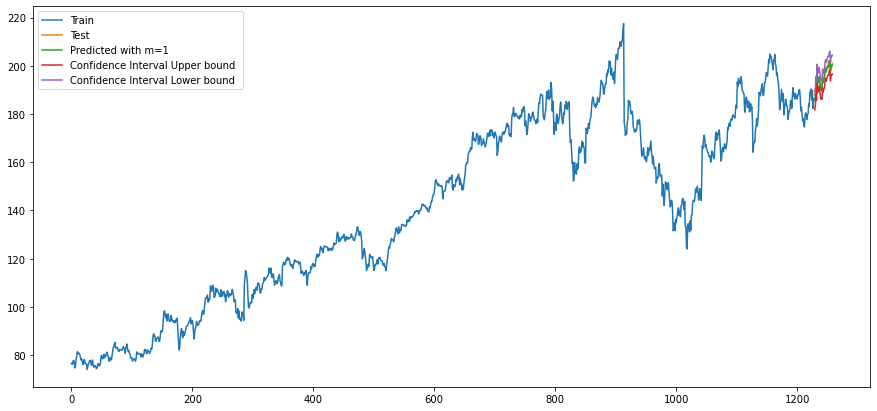

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 1


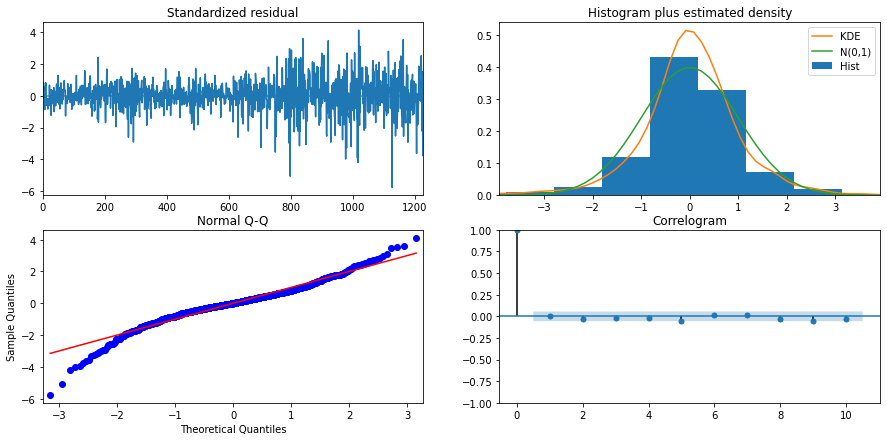

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 4
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[4] intercept   : AIC=5158.880, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=5178.246, Time=0.40 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=5159.298, Time=1.75 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=5157.178, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=5176.629, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=5155.602, Time=0.52 sec
 ARIMA(0,0,1)(1,0,0)[4] intercept   : AIC=5157.322, Time=1.60 sec
 ARIMA(0,0,1)(1,0,1)[4] intercept   : AIC=5158.636, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=5155.727, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[4] intercept   : AIC=5156.191, Time=1.44 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=5157.564, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[4] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(0,0,1)(0,0,0)[4]    

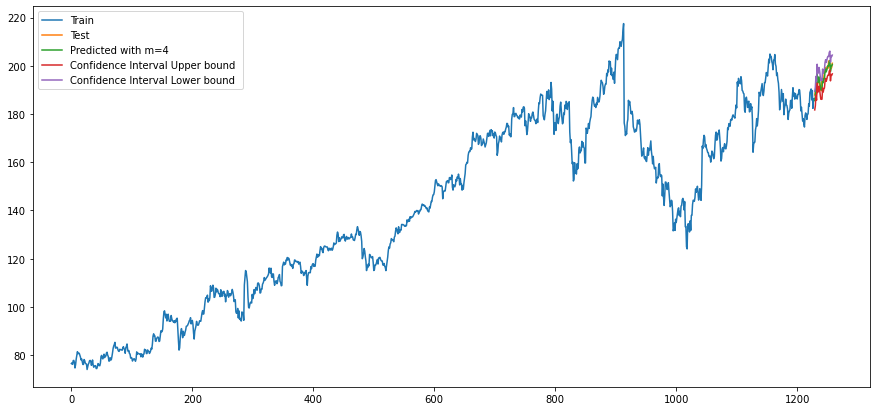

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 4


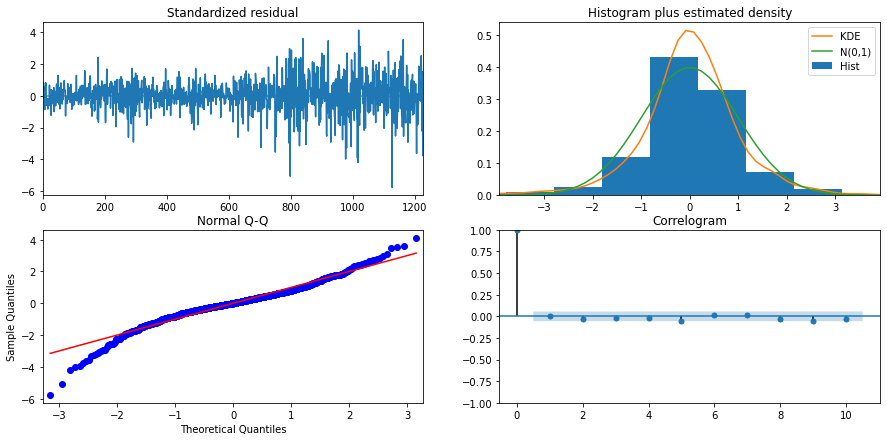

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 7
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=5159.442, Time=2.00 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5178.246, Time=0.47 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5158.762, Time=2.40 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5157.057, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=5176.629, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=5155.602, Time=0.51 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=5157.097, Time=2.10 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=5159.158, Time=1.00 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=5155.727, Time=0.63 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=5156.191, Time=1.36 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5157.564, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,0,1)(0,0,0)[7]    

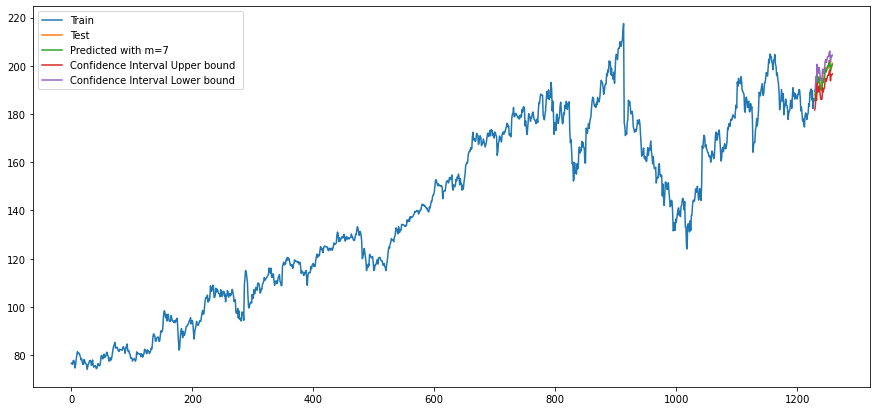

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 7


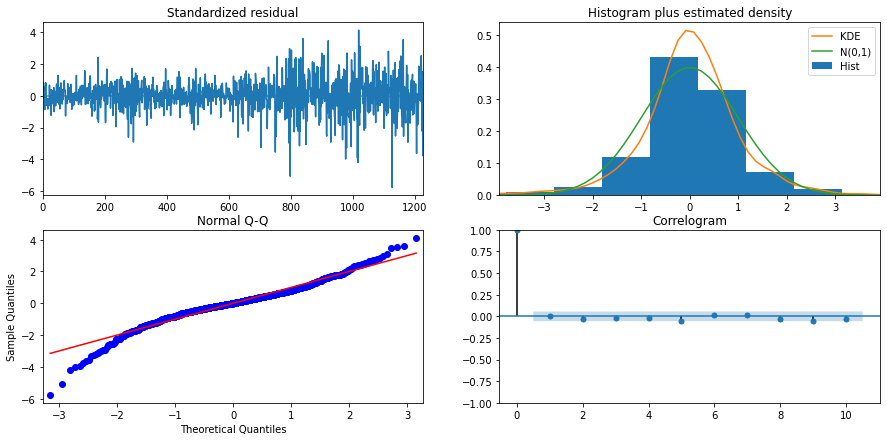

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 12
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=5158.566, Time=4.28 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5178.246, Time=0.40 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5158.340, Time=1.40 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5156.426, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5176.629, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5155.602, Time=0.57 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=5156.262, Time=3.41 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=5158.620, Time=1.57 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=5155.727, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=5156.191, Time=1.38 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=5157.564, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(0,0,1)(

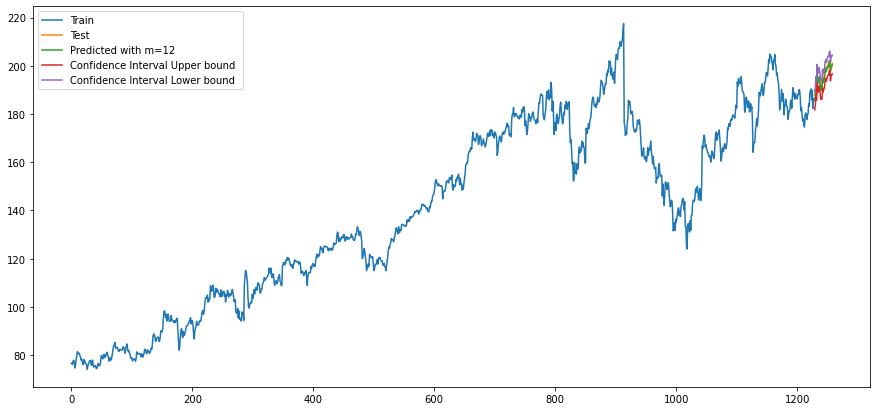

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 12


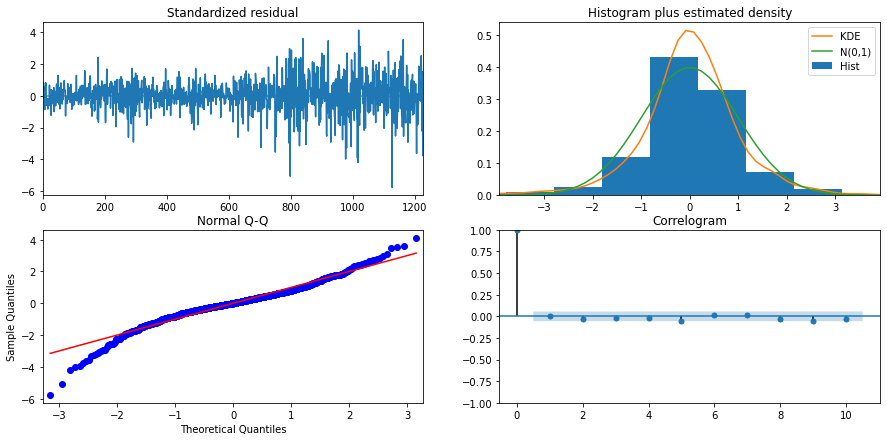

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 52
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=5159.726, Time=16.95 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=5178.246, Time=0.37 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=5159.372, Time=30.77 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=5157.610, Time=4.23 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5176.629, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=5155.602, Time=0.39 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=5157.586, Time=8.15 sec
 ARIMA(0,0,1)(1,0,1)[52] intercept   : AIC=5159.551, Time=20.10 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=5155.727, Time=0.52 sec
 ARIMA(0,0,2)(0,0,0)[52] intercept   : AIC=5156.191, Time=1.37 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=5157.564, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[52] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,0,

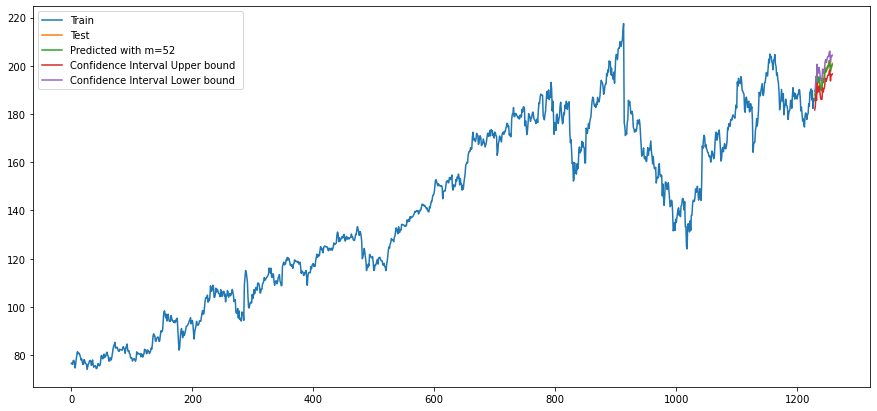

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 52


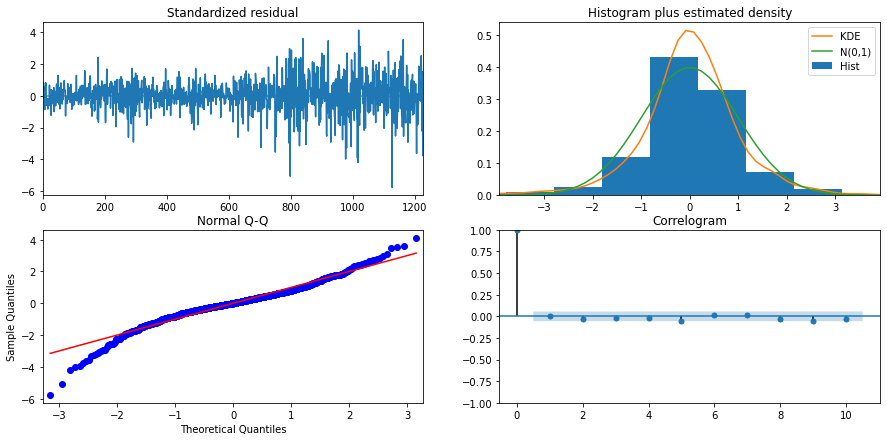

----------------------------------------------------------------------------------------------------


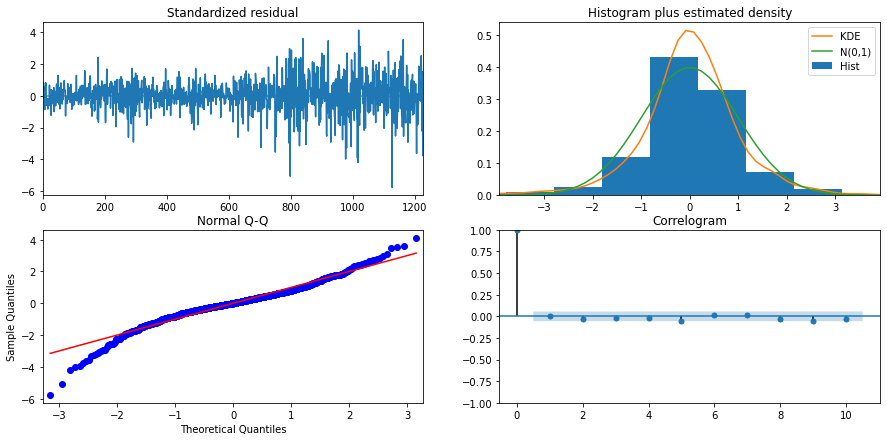

In [11]:
for m in [1, 4,7,12,52]:
    print("="*100)
    print(f' Fitting SARIMAX for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(actualtrain,exogenous =exotrain ,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=True,start_P=1,start_Q=1,max_P=7,max_D=7,max_Q=7,m=m,
    d=None,D=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast,conf_int = stepwise_model.predict(n_periods=30,exogenous =exotest,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(1229, 1259)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(1229, 1259)
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(actualtest, forecast)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(actualtrain, label='Train ')
    plt.plot(actualtest, label='Test ')
    plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')
    
    display(stepwise_model.plot_diagnostics());
    print("-"*100)